In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
2D_orbit_modeling_K.pdf
2D_orbit_modeling_K1.ipynb
2D_orbit_modeling_K1.pdf
2D_orbit_modeling_K2.ipynb
2D_orbit_modeling_K2.pdf
2D_orbit_modeling_P.ipynb
2D_orbit_modeling_P.pdf
2D_orbit_modeling_e.ipynb
2D_orbit_modeling_e.pdf
2D_orbit_modeling_tau.ipynb
2D_orbit_modeling_tau.pdf
2D_orbit_modeling_w.ipynb
2D_orbit_modeling_w.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev3.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev

In [3]:
#Read data ---#1
Input = "Linear_fit_Beuermann_2011_Table1_rev.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2400000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

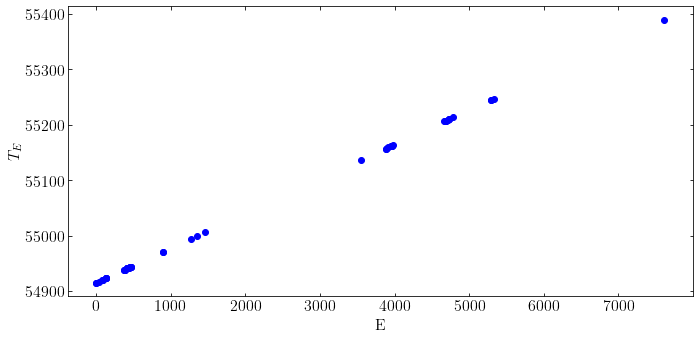

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

54


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

#params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)
params, params_covariance = optimization.curve_fit(linear_fit, x, y,sigma=dy, absolute_sigma=True)

Period = params[0]
T0 = params[1]

dPeriod = params_covariance[0,0]
dT0 = params_covariance[1,1]


print('Slope (m) is ', Period)
print('The error of the slope (dm) is ', dPeriod)
print('Intercept (c) is ', T0)
print('The error of the intercept (dc) is ', dT0)
#print(covariance)

Slope (m) is  0.06236285649304073
The error of the slope (dm) is  8.980005261065642e-19
Intercept (c) is  54914.832292031744
The error of the intercept (dc) is  7.591088868471324e-12


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, *params)

ys = Period*x + T0 #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

print(x_line)
print(y_line)
print(len(x_line))

#np.savetxt("Linear_fit_period_year_2020g.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
n = 2
dof = len_x - n
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[54914.83228  54914.894663 54916.827926 54919.696603 54920.756784
 54922.627668 54922.690017 54922.752365 54922.814727 54937.781831
 54937.844195 54938.717285 54938.779611 54940.650507 54940.712869
 54940.775243 54940.837637 54941.773045 54941.835408 54942.646122
 54942.770852 54942.833221 54942.895591 54943.706304 54943.768653
 54943.831008 54970.647033 54970.709414 54993.658926 54998.647982
 55005.632601 55135.970976 55156.9249   55156.987244 55157.922708
 55158.982865 55160.916107 55160.978466 55161.913906 55161.976285
 55162.911738 55205.942102 55206.004463 55206.93992  55207.002308
 55208.873171 55209.870977 55209.933305 55209.995687 55212.989111
 55244.918892 55244.981257 55246.976864 55389.66308 ]
[54914.83229203 54914.89465489 54916.82790344 54919.69659484
 54920.7567634  54922.62764909 54922.69001195 54922.75237481
 54922.81473766 54937.78182322 54937.84418608 54938.71726607
 54938.77962893 54940.65051462 54940.71287748 54940.77524033
 54940.83760319 54941.77304604 54941.83540

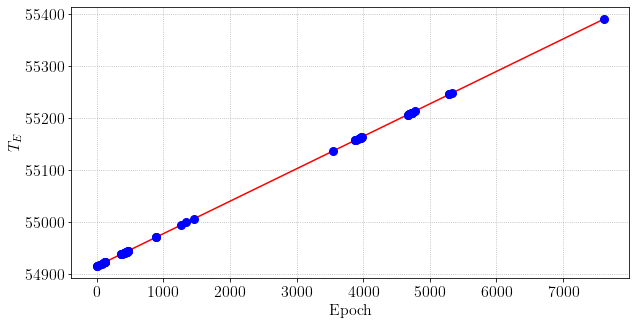

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

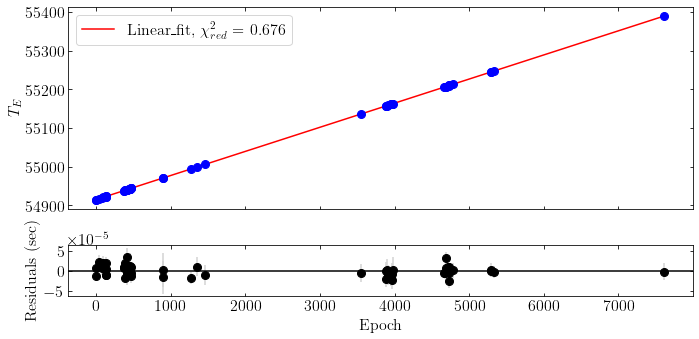

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("Linear_fit_period_year_2020g_Res.jpg", dpi=1000)

plt.show()

In [10]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [11]:
t = np.linspace(50000, 66000, num=100)

x_data = []
for i in range(len(t)):
    print('%0.0f %0.5f' %(i, t[i]))
    x_data.append('%0.0f %0.5f' %(i, t[i]))
    
data_out = x_data
f = open("x_data.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

0 50000.00000
1 50161.61616
2 50323.23232
3 50484.84848
4 50646.46465
5 50808.08081
6 50969.69697
7 51131.31313
8 51292.92929
9 51454.54545
10 51616.16162
11 51777.77778
12 51939.39394
13 52101.01010
14 52262.62626
15 52424.24242
16 52585.85859
17 52747.47475
18 52909.09091
19 53070.70707
20 53232.32323
21 53393.93939
22 53555.55556
23 53717.17172
24 53878.78788
25 54040.40404
26 54202.02020
27 54363.63636
28 54525.25253
29 54686.86869
30 54848.48485
31 55010.10101
32 55171.71717
33 55333.33333
34 55494.94949
35 55656.56566
36 55818.18182
37 55979.79798
38 56141.41414
39 56303.03030
40 56464.64646
41 56626.26263
42 56787.87879
43 56949.49495
44 57111.11111
45 57272.72727
46 57434.34343
47 57595.95960
48 57757.57576
49 57919.19192
50 58080.80808
51 58242.42424
52 58404.04040
53 58565.65657
54 58727.27273
55 58888.88889
56 59050.50505
57 59212.12121
58 59373.73737
59 59535.35354
60 59696.96970
61 59858.58586
62 60020.20202
63 60181.81818
64 60343.43434
65 60505.05051
66 60666.66667
67 60

In [12]:
#Input data
Input = "x_data.out"
Data   = np.genfromtxt(Input)

x = Data[:,1]
#print(t)

t = x
len_x = len(t)

Epoch = (t-BJD0)/P0

In [13]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [14]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [15]:
#Parameters
K = 711       
P = 10220       
e = 0.39  
#e = 0
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.42344 4.10352 56698.04620 56141.61722 556.42898
50161.61616 4.52280 4.18566 56805.47996 56303.23338 502.24658
50323.23232 4.62216 4.26974 56910.01813 56464.84954 445.16859
50484.84848 4.72152 4.35602 57011.79448 56626.46570 385.32878
50646.46465 4.82088 4.44476 57110.98043 56788.08187 322.89856
50808.08081 4.92024 4.53627 57207.79708 56949.69803 258.09905
50969.69697 5.01960 4.63089 57302.53111 57111.31419 191.21692
51131.31313 5.11896 4.72901 57395.55574 57272.93035 122.62539
51292.92929 5.21832 4.83106 57487.35830 57434.54651 52.81179
51454.54545 5.31768 4.93752 57578.57627 57596.16267 -17.58641
51616.16162 5.41704 5.04892 57670.04344 57757.77884 -87.73540
51777.77778 5.51640 5.16581 57762.84711 57919.39500 -156.54789
51939.39394 5.61576 5.28877 57858.39439 58081.01116 -222.61677
52101.01010 5.71512 5.41833 57958.47958 58242.62732 -284.14774
52262.62626 5.81448 5.55490 58065.33151 58404.24348 -338.91197
52424.242

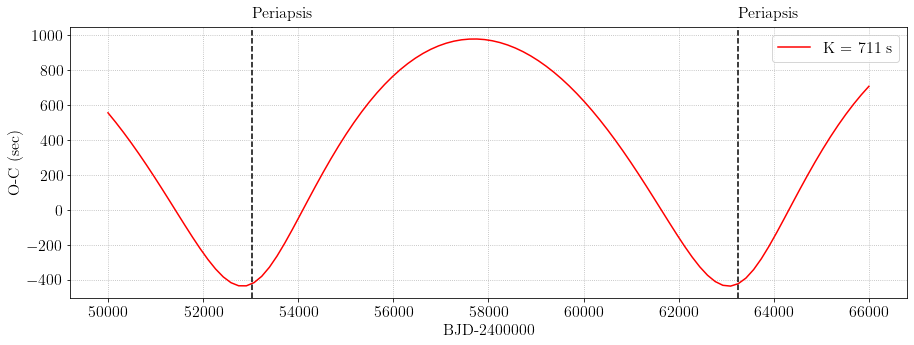

In [16]:
InputFile_out = "K_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')

plt.axvline(x=float(tau), color='k', linestyle='--')
plt.axvline(x=float(tau+P), color='k', linestyle='--')

plt.text(float(tau), 1100, 'Periapsis')
plt.text(float(tau+P), 1100, 'Periapsis')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [17]:
#Parameters
K = 1400       
P = 10220       
e = 0.39 
#e = 0 
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.42344 4.10352 57237.25760 56141.61722 1095.64038
50161.61616 4.52280 4.18566 57292.18543 56303.23338 988.95205
50323.23232 4.62216 4.26974 57341.41170 56464.84954 876.56215
50484.84848 4.72152 4.35602 57385.19977 56626.46570 758.73406
50646.46465 4.82088 4.44476 57423.88718 56788.08187 635.80531
50808.08081 4.92024 4.53627 57457.90932 56949.69803 508.21129
50969.69697 5.01960 4.63089 57487.83066 57111.31419 376.51647
51131.31313 5.11896 4.72901 57514.38609 57272.93035 241.45574
51292.92929 5.21832 4.83106 57538.53520 57434.54651 103.98868
51454.54545 5.31768 4.93752 57561.53321 57596.16267 -34.62946
51616.16162 5.41704 5.04892 57585.02192 57757.77884 -172.75692
51777.77778 5.51640 5.16581 57611.14226 57919.39500 -308.25274
51939.39394 5.61576 5.28877 57642.66494 58081.01116 -438.34622
52101.01010 5.71512 5.41833 57683.12301 58242.62732 -559.50431
52262.62626 5.81448 5.55490 57736.90520 58404.24348 -667.33828
52424.

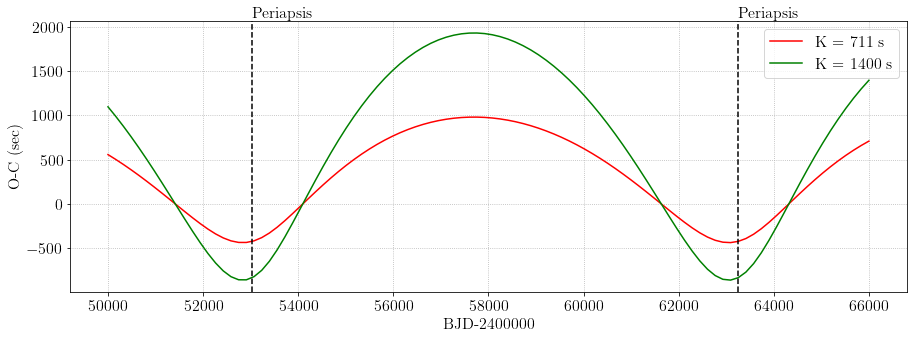

In [18]:
InputFile_out = "K_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')
plt.plot(x_b, y_b, '-', color='green',label='K = 1400 s')

plt.axvline(x=float(tau), color='k', linestyle='--')
plt.axvline(x=float(tau+P), color='k', linestyle='--')

plt.text(float(tau), 2100, 'Periapsis')
plt.text(float(tau+P), 2100, 'Periapsis')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [19]:
#Parameters
K = 2033       
P = 10220       
e = 0.39
#e = 0 
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.42344 4.10352 57732.64339 56141.61722 1591.02617
50161.61616 4.52280 4.18566 57739.33284 56303.23338 1436.09946
50323.23232 4.62216 4.26974 57737.74279 56464.84954 1272.89325
50484.84848 4.72152 4.35602 57728.25571 56626.46570 1101.79001
50646.46465 4.82088 4.44476 57711.36174 56788.08187 923.27987
50808.08081 4.92024 4.53627 57687.69313 56949.69803 737.99510
50969.69697 5.01960 4.63089 57658.06959 57111.31419 546.75540
51131.31313 5.11896 4.72901 57623.55825 57272.93035 350.62790
51292.92929 5.21832 4.83106 57585.55258 57434.54651 151.00607
51454.54545 5.31768 4.93752 57545.87536 57596.16267 -50.28731
51616.16162 5.41704 5.04892 57506.91071 57757.77884 -250.86813
51777.77778 5.51640 5.16581 57471.76756 57919.39500 -447.62744
51939.39394 5.61576 5.28877 57444.46938 58081.01116 -636.54178
52101.01010 5.71512 5.41833 57430.14666 58242.62732 -812.48066
52262.62626 5.81448 5.55490 57435.17246 58404.24348 -969.07102
524

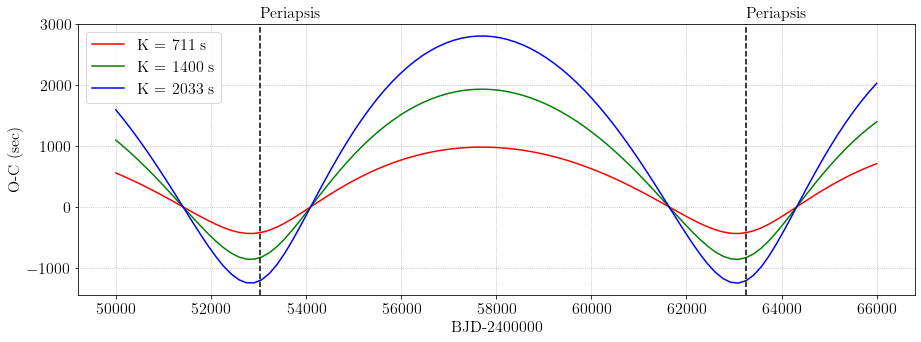

In [21]:
InputFile_out = "K_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')
plt.plot(x_b, y_b, '-', color='green',label='K = 1400 s')
plt.plot(x_c, y_c, '-', color='blue',label='K = 2033 s')

plt.axvline(x=float(tau), color='k', linestyle='--')
plt.axvline(x=float(tau+P), color='k', linestyle='--')

plt.text(float(tau), 3100, 'Periapsis')
plt.text(float(tau+P), 3100, 'Periapsis')


#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [22]:
#Parameters
K = 2632       
P = 10220       
e = 0.39 
#e = 0 
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.42344 4.10352 58201.42079 56141.61722 2059.80357
50161.61616 4.52280 4.18566 58162.46285 56303.23338 1859.22947
50323.23232 4.62216 4.26974 58112.78596 56464.84954 1647.93642
50484.84848 4.72152 4.35602 58052.88527 56626.46570 1426.41957
50646.46465 4.82088 4.44476 57983.39534 56788.08187 1195.31346
50808.08081 4.92024 4.53627 57905.13469 56949.69803 955.43666
50969.69697 5.01960 4.63089 57819.16455 57111.31419 707.85036
51131.31313 5.11896 4.72901 57726.86650 57272.93035 453.93614
51292.92929 5.21832 4.83106 57630.04454 57434.54651 195.49803
51454.54545 5.31768 4.93752 57531.05854 57596.16267 -65.10413
51616.16162 5.41704 5.04892 57432.99505 57757.77884 -324.78380
51777.77778 5.51640 5.16581 57339.87902 57919.39500 -579.51599
51939.39394 5.61576 5.28877 57256.91940 58081.01116 -824.09177
52101.01010 5.71512 5.41833 57190.75830 58242.62732 -1051.86902
52262.62626 5.81448 5.55490 57149.64654 58404.24348 -1254.59694


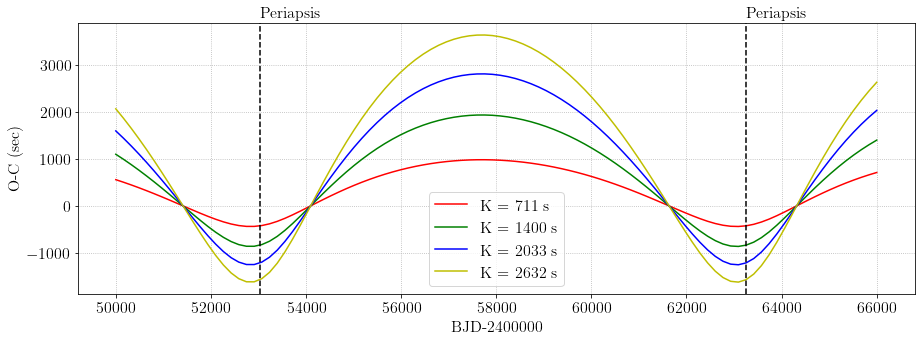

In [27]:
InputFile_out = "K_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')
plt.plot(x_b, y_b, '-', color='green',label='K = 1400 s')
plt.plot(x_c, y_c, '-', color='blue',label='K = 2033 s')
plt.plot(x_d, y_d, '-', color='y',label='K = 2632 s')

plt.axvline(x=float(tau), color='k', linestyle='--')
plt.axvline(x=float(tau+P), color='k', linestyle='--')

plt.text(float(tau), 4000, 'Periapsis')
plt.text(float(tau+P), 4000, 'Periapsis')


#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev3.pdf", format='pdf', dpi=1200)
plt.show()